# Customer Churn Analysis

In [174]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [175]:
df=pd.read_csv('customer_churn_analysis.csv')

In [176]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [177]:
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

In [178]:
df.shape

(7043, 21)

there are 7043 rowsand 21 columns

In [179]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Dataframe Description

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

It is a classification type of problem with out target variable being 'churn'.
Our target variable has two states yes/no soit is a binary classification problem.

In [180]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

'Churn' is our target variable which has classes it has to be encoded.

# Checking null values

In [181]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset

Heatmap for the representation of null values

<AxesSubplot:>

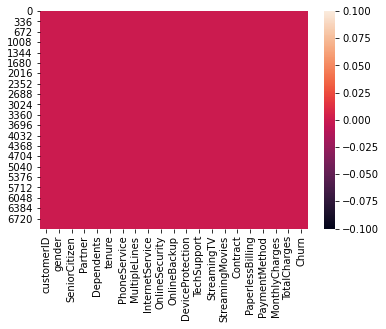

In [182]:
sns.heatmap(df.isnull())

The above heatmap also shows the absence of null values.

In [183]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

There are 2 unique classes in df['Churn']

In [184]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Class imbalance exists between our two classes of the target variable.

# Making dataframe for the nominal data:

In [185]:
df_visualization_nominal=df[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','Churn']].copy()

In [186]:
df_visualization_nominal.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

# Visualiztion of the data

For the nominal categorical data we will use the countplot as it will give the frequency of the classes of the columns.

Male      3555
Female    3488
Name: gender, dtype: int64


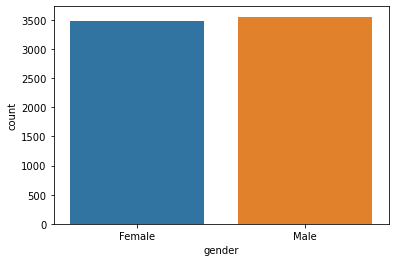

In [187]:
ax=sns.countplot(x='gender',data=df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

From the above observations the total number of males is 3555 andthe number of females is 3488.

No     3641
Yes    3402
Name: Partner, dtype: int64


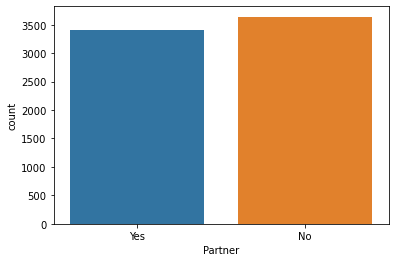

In [188]:
ax=sns.countplot(x='Partner',data=df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

From the above observations the total number of people having partners is 3402 and the number of people who are single is 3641.

No     4933
Yes    2110
Name: Dependents, dtype: int64


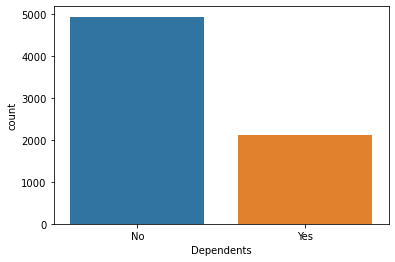

In [189]:
ax=sns.countplot(x='Dependents',data=df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

From the above graph we can see that the total number of dependent people are 2110 and the total no of independent people are 4933. 

Yes    6361
No      682
Name: PhoneService, dtype: int64


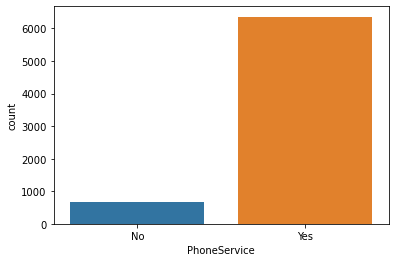

In [190]:
ax=sns.countplot(x='PhoneService',data=df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

from the above graph people who use phone service are 6361 andwho do not use phone service are 682 in number.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


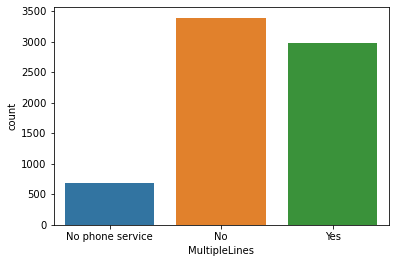

In [191]:
ax=sns.countplot(x='MultipleLines',data=df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

From the above graph the no of people who use multiple lines are 2971,who dont have multiplelines are 3390 and who dont use phone servive are 682 in number.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


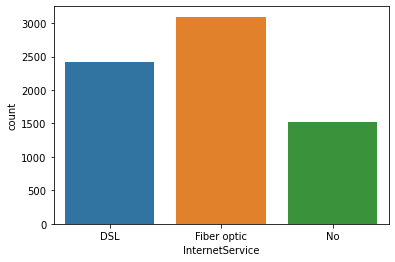

In [192]:
ax=sns.countplot(x='InternetService',data=df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

From the above graph the number of people using fiber optic is 3096,the number of peopleusing DSL is 2421 and 1526 people do not use internet.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


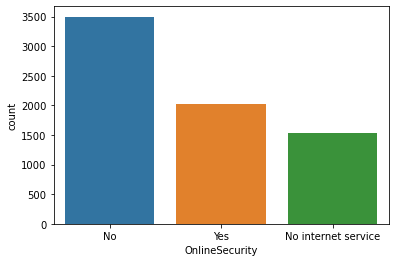

In [193]:
ax=sns.countplot(x='OnlineSecurity',data=df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

From the above graph the no of people having online security is 2019,no security is 3498 andno internet service is 1526

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


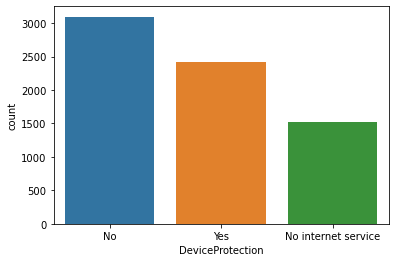

In [194]:
ax=sns.countplot(x='DeviceProtection',data=df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

From the above graphwe can see that 3095 people have no device protection,2422 have thier device protected and 1526 have no internet service.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


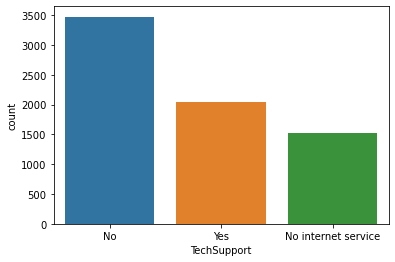

In [195]:
ax=sns.countplot(x='TechSupport',data=df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

from the above graph 3473 people haveno TechSupport,2044 have TechSupport and 1526 have no internet service.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


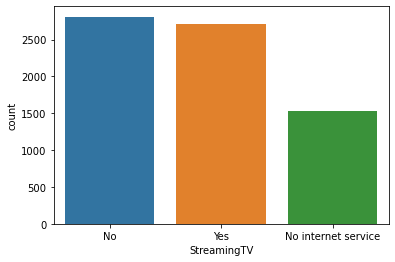

In [196]:
ax=sns.countplot(x='StreamingTV',data=df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

From the above graph we get to see that 2810 people have nostreaming TV,2707 people have streaming TV and1526 have no internet service.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


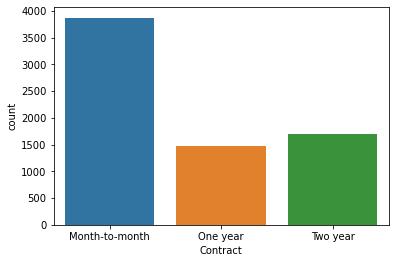

In [197]:
ax=sns.countplot(x='Contract',data=df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

From the above graph people have Month-to Month contract is 3875,two year contract is 1695,one year contract is 1473.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


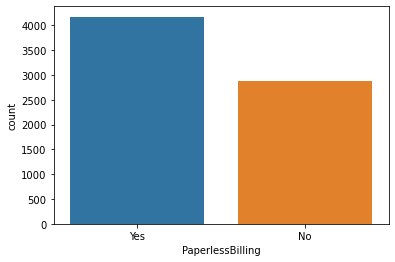

In [198]:
ax=sns.countplot(x='PaperlessBilling',data=df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

From the above graph people who have opted for paperlessBilling are 4171 and people who dint opt for paperlessBilling are 2872 in number.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


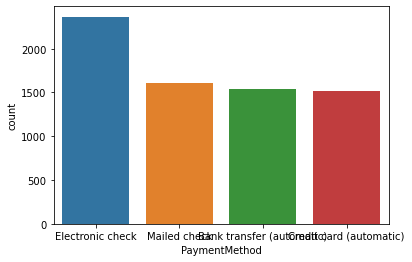

In [199]:
ax=sns.countplot(x='PaymentMethod',data=df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

From the above graph people who use electronic check for their mode ofpayment is 2365,mailed check asmode of payment is 1612,bank transfer as mode of payment is 1544,and credit card as mode of payment is 1522.

No     5174
Yes    1869
Name: Churn, dtype: int64


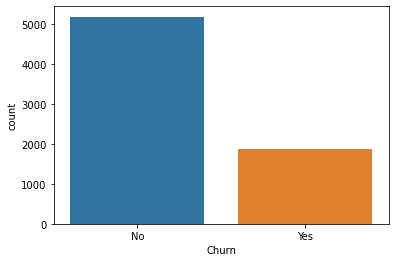

In [200]:
ax=sns.countplot(x='Churn',data=df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

From the above graph we can see that the noof people who stop doing buissness is 5174 and who do it is 1869. 

It is better to convert our target variable'Churn'to numeric so it will be easy for calculations. 

In [201]:
churn_numeric={'Yes':1,'No':0}
df.Churn.replace(churn_numeric,inplace=True)

In [202]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, we will not use gender variable in the machine learning model.

Similarly, we can check other binary categorical features in terms of churn rate:

In [203]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [204]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [205]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


In [206]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [207]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


the other binary features also have an efect on the targetvariable.

In [208]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


From the graph anf the above calculation we can see that internet service is an imporatnt feature inpredicting the churn rate.Customers with fibre optic service are likely to churn.

However we cannot conclude with one variable lets check with MonthlyCharges.

In [209]:
df[['InternetService','MonthlyCharges']].groupby(['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


we notice that fibreoptic service is expensive compared to the other two and hence customers churn.

In [210]:
df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [211]:
df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [212]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [213]:
df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [214]:
df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [215]:
df[['TechSupport','Churn']].groupby(['TechSupport']).mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


All internet service related features seem to have different churn rates for their classes because churn rate changes according to customers having these services. The difference on StreamingTV and StreamingMovies are not much but they can still bring value to the model. 

In [216]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [217]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

if a customer has no phoneservice then he cannot have multiplelines.So multiplelines column is more specific when compared to phoneservices.
lets see if multiplelines changes the churn rate:

In [218]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


the churn rate is similar like in streaming tv and movies.

In [219]:
df[['Contract','Churn']].groupby(['Contract']).mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


customers with short term contract are more likey to churn.Hence companies will have huge term contracts to maintain a long term relation with their customers.

In [220]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


Customers using electronic check mode of payment are likely to churn.

# Continuous Features

Tenure,Monthly charges and total charges are the continuous features.Lets look at the distribution of data in these columns.

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

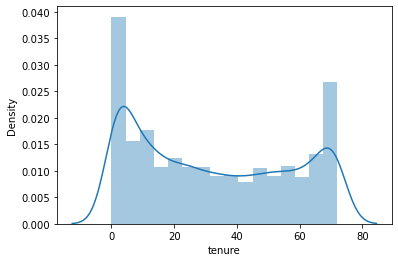

In [221]:
sns.distplot(df['tenure'])

Data is not normally distributed and most of the customers are either new or have had a  long stay with the company

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

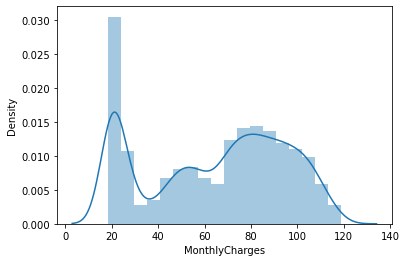

In [222]:
sns.distplot(df['MonthlyCharges'])

Monthly charges also data is not normally distributed and we can infer the same observation as is tenure.

Churn rate changes according to tenure and monthly charges,

In [223]:
df[['tenure','MonthlyCharges','Churn']].groupby(['Churn']).mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


People who have been a customer for a long time tend to have a long-term relation with the company. 

contract and tenure features maybe correlated .

In [224]:
df[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


contarct and tenure are highly correlated.Customers with long contracts have been a customer for long. 

# Dropping the columns,

After EDA,wecan drop the following columns,
Customer ID,
Gender,
PhoneService,
Contract,
TotalCharges

In [225]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'],axis=1,inplace=True)

In [226]:
df

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,0
7039,0,Yes,Yes,72,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,0
7040,0,Yes,Yes,11,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,29.60,0
7041,1,Yes,No,4,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,74.40,1


Converting Categorical features to numbers

In [227]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [228]:
LE=LabelEncoder()

In [229]:
df['Churn']=LE.fit_transform(df['Churn'])

In [230]:
df['Churn'].unique()

array([0, 1])

In [231]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


In [232]:
categorical_features=['SeniorCitizen','Partner','Dependents','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']

In [233]:
X=pd.get_dummies(df,columns=categorical_features,drop_first=True)

In [234]:
X

,tenure,MultipleLines,MonthlyCharges,Churn,SeniorCitizen_1,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,No phone service,29.85,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,34,No,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,No,53.85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,No phone service,42.30,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2,No,70.70,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,Yes,84.80,0,0,1,1,0,0,0,...,0,1,0,1,0,1,1,0,0,1
7039,72,Yes,103.20,0,0,1,1,1,0,0,...,0,0,0,1,0,1,1,1,0,0
7040,11,No phone service,29.60,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,Yes,74.40,1,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# Scaling continuous variables 

In [235]:
sc=MinMaxScaler()
a=sc.fit_transform(df[['tenure']])
b=sc.fit_transform(df[['MonthlyCharges']])

In [236]:
X['tenure']=a
X['MonthlyCharges']=b

new dimension of the dataset:

In [237]:
X.shape

(7043, 25)

there are 7043 rows and 25 columns.

Target variable there was class imbalance lets use upsampling to balance the two classes

No     5174
Yes    1869
Name: Churn, dtype: int64


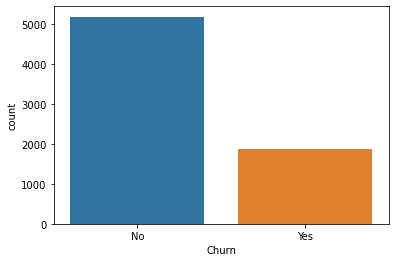

In [238]:
ax=sns.countplot(x='Churn',data=df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

In [239]:
X_no=X[X.Churn==0]
X_yes=X[X.Churn==1]

upsampling:

In [240]:
X_yes_upsampled=X_yes.sample(n=len(X_no),replace=True,random_state=42)

In [241]:
print(len(X_yes_upsampled))

5174


In [242]:
X_upsampled=X_no.append(X_yes_upsampled).reset_index(drop=True)

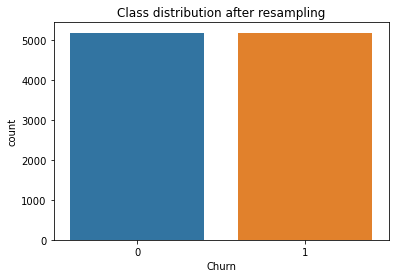

In [243]:
ax=sns.countplot(x='Churn',data=X_upsampled).set_title('Class distribution after resampling')

From the above graph we can see that boththe classes yea/no are balanced after upsamling.

# Model creation

In [244]:
from sklearn.model_selection import train_test_split

In [245]:
X=X_upsampled.drop(['Churn'],axis=1)
y=X_upsampled['Churn']

In [246]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Ridge Classifier

In [247]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [250]:
clf_ridge=RidgeClassifier()
clf_ridge.fit(X_train,y_train)

ValueError: could not convert string to float: 'No'

# Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
clf_forest=RandomForestClassifier(n_estimators=100,max_depth=10)

In [134]:
clf_forest.fit(X_train,y_train)

ValueError: could not convert string to float: 'No'